# 非線形最適化の基礎第3章パート1(局所的最適解と大域的最適解)
このページでは，[非線形最適化の基礎](https://www.asakura.co.jp/detail.php?book_code=28001)について，自分に向けた解説を書いていきます．本から引用するものは，定理や補題などの事実のみであり，それらに対する解釈は著作権侵害に当たるため，書いていません．定理や補題などは主に解釈や直感などを書きます．


## 局所的最適解
以下の制約付き最適化問題を考えましょう．
$$
\begin{aligned}
\text{目的関数}&:f(\boldsymbol{x}) \longrightarrow \text{最小}\\
\text{制約条件}& :x ∈ S \\
\end{aligned}
$$
この問題の**最適解**とは何でしょうか？実はいくつかの最適解があります．ここで，解を$\bar{x}$とします．

**局所的最適解**：
$\bar{x}$の**近くにある**ほかの$x \in S$に対して，常に$f(x̄) ≤ f(x)$が成り立つ場合

**狭義局所的最適解**：
局所的最適解の条件を更にきつくした(等式を消したもの)ものがこれです．$x̄$ の近くにある $x̄$ **以外の**実行可能な点$x$に対しては、必ず $f(x̄) < f(x)$ が成り立つ場合

**孤立局所的最適解**：
$x̄$ について，自分のごく近くに自分以外の局所的最適解が存在しない場合をいいます．






**例3.1**：
狭義局所的最適解(Strict Local Optimal  Solution)と孤立局所的最適解(Isolated Local Optimal Solution)の違いをPythonを使って可視化しましょう．

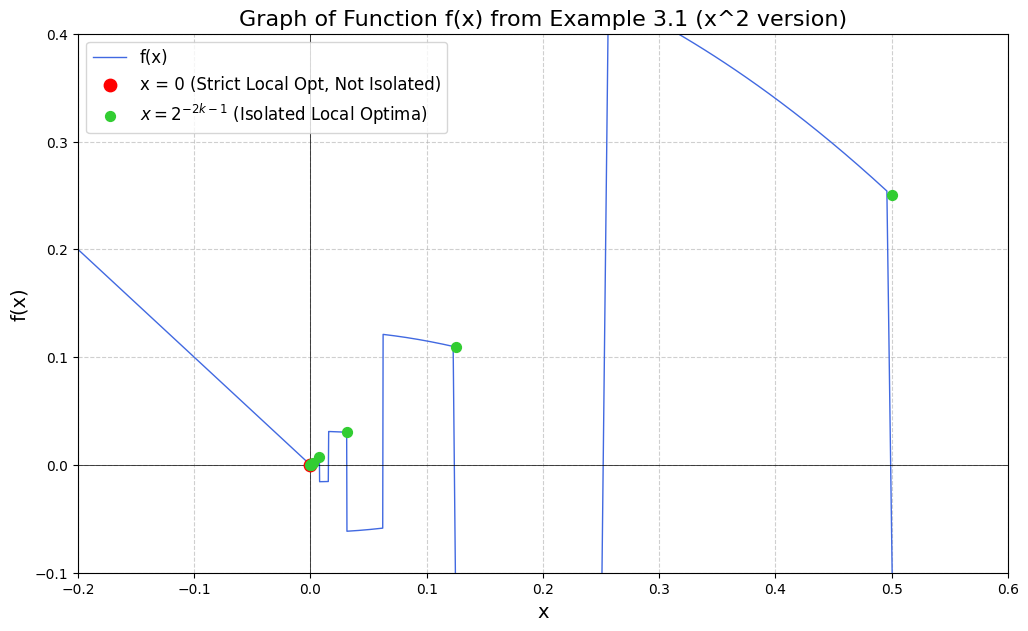

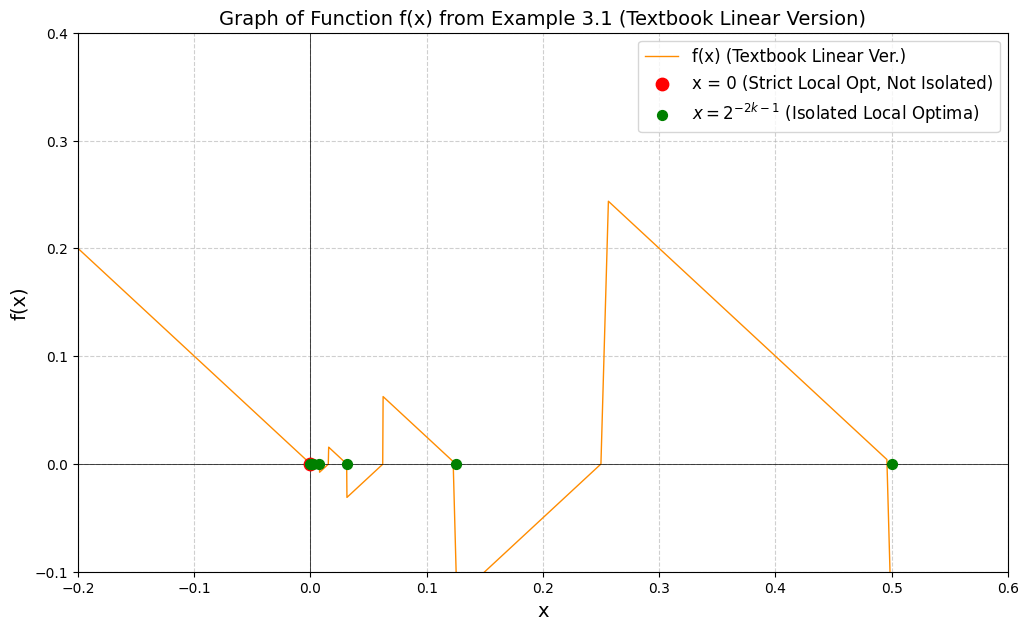

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

def f_example3_1(x):
    if x <= 0:
        return -x
    else:
        k_found = False
        max_k = 15
        min_k = -5

        if 0 < x < 2.0**(-2*max_k - 1):
            return x**2

        for k in range(max_k, min_k - 1, -1):
            bound_mid = 2.0**(-2*k)
            bound_upper = 2.0**(-2*k + 1)
            bound_lower = 2.0**(-2*k - 1)

            if bound_mid < x <= bound_upper:
                return -x**2 + bound_upper
                k_found = True
                break
            elif bound_lower < x <= bound_mid:
                return x**2 - bound_mid
                k_found = True
                break

        if not k_found:
             return -x**2

f_vectorized = np.vectorize(f_example3_1)


x_neg = np.linspace(-0.5, 0, 200)
x_pos_log = np.logspace(-5, 0.5, 500)
x_pos_lin = np.linspace(1e-9, 0.1, 300)
x_pos = np.sort(np.unique(np.concatenate((x_pos_log, x_pos_lin))))
x = np.concatenate((x_neg, x_pos))

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    y = f_vectorized(x)

k_vals = np.arange(0, 8)
local_min_x = 2.0**(-2*k_vals - 1)
local_min_y = f_vectorized(local_min_x)

# Point x=0
x0 = 0
y0 = f_example3_1(x0)

plt.figure(figsize=(12, 7))
plt.plot(x, y, label='f(x)', linewidth=1.0, color='royalblue')

# Highlight optimal points
plt.scatter([x0], [y0], color='red', s=80, zorder=5,
            label=f'x = {x0} (Strict Local Opt, Not Isolated)') # English Label
plt.scatter(local_min_x, local_min_y, color='limegreen', s=50, marker='o', zorder=5,
            label=r'$x = 2^{-2k-1}$ (Isolated Local Optima)') # English Label

# Plot decorations (English)
plt.title('Graph of Function f(x) from Example 3.1 (x^2 version)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12) # Labels are now in English
plt.ylim(-0.1, 0.4)
plt.xlim(-0.2, 0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


def f_textbook_linear(x):
    """Calculates the function from Example 3.1 (textbook linear version)."""
    if x <= 0:
        return -x
    else:
        k_found = False
        max_k = 15
        min_k = -5
        if 0 < x < 2.0**(-2*max_k - 1):
            k = max_k + 1
            return x - 2.0**(-2*k)
        for k in range(max_k, min_k - 1, -1):
            bound_mid = 2.0**(-2*k)
            bound_upper = 2.0**(-2*k + 1)
            bound_lower = 2.0**(-2*k - 1)
            if bound_mid < x <= bound_upper:
                return -x + bound_upper
                k_found = True
                break
            elif bound_lower < x <= bound_mid:
                return x - bound_mid
                k_found = True
                break
        if not k_found:
            k = min_k
            return -x + 2.0**(-2*k+1)

f_linear_vectorized = np.vectorize(f_textbook_linear)
y_linear = f_linear_vectorized(x)
local_min_y_linear = f_linear_vectorized(local_min_x)

plt.figure(figsize=(12, 7))
plt.plot(x, y_linear, label='f(x) (Textbook Linear Ver.)', linewidth=1.0, color='darkorange')
plt.scatter([x0], [y0], color='red', s=80, zorder=5,
            label=f'x = {x0} (Strict Local Opt, Not Isolated)') 
plt.scatter(local_min_x, local_min_y_linear, color='green', s=50, marker='o', zorder=5,
            label=r'$x = 2^{-2k-1}$ (Isolated Local Optima)')

plt.title('Graph of Function f(x) from Example 3.1 (Textbook Linear Version)', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12) # Labels are now in English
plt.ylim(-0.1, 0.4)
plt.xlim(-0.2, 0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

## 大域的最適解
先ほどまで見てきた最適解はあくまでその解自身の周辺で一番よいもでした．しかし最適化問題というのはすべての考えられる範囲での最適解を求めたいわけです．それを満たす，すべての範囲における最適解を大域的最適解といいます．

**大域的最適解**：$x̄$が**すべての** 実行可能な点$x (x ∈ S)$に対して、**常に**$f(x̄) ≤ f(x)$が成り立つ場合

大域的最適解ならば，必ず局所的最適解になります．逆は必ずしも成り立ちません．

### 局所解が最適解になる条件(凸性)
局所解が必ず大域的最適解になるために，凸性は重要なポジションにいるといえるでしょう．目的関数，制約を満たす点の集合が凸ならば任意の局所的最適解が必ず大域的最適解になります．以下2つの定理はそれを示したものです．

**定理3.1**
目的関数が，凸関数であり，$S$が凸集合ならば，任意の局所的最適解は必ず大域的最適解になります．

**定理3.2**
目的関数が，**狭義凸関数なら**，最適解が存在すればそれはただ一つに定まります．強凸関数に関しても同じことが言えます．
* 狭義凸関数：グラフが平らな部分を持たないような関数です．以下の図が参考になります．
* 強凸関数：狭義凸関数よりも凸形状の条件が厳しいものです．

![https://www.researchgate.net/figure/Comparison-of-strongly-convex-and-convex-functions-The-strongly-convex-function-has-only_fig5_355093246](https://cdn.mathpix.com/snip/images/Ezw1P4t5hAJ-c4bG5q51GcE6wEb-ZJ9usYI6aG3MjkA.original.fullsize.png)


## 最適解であるための必要条件(接錐と法線錐)

### 接錐
$S$に属する$x̄$が最適，ここでは最小であるとは，その点から少しだけ動かした$x$の$f(x)$が増加(か減少しないように)する必要があります．一方で$x$は$S$の範囲から出ることは制約上できません．接錐はある点$x̄$から制約の中で動かすことができる方向を数学的に表現したものになります．

**定義**：
点 $x̄ ∈ S$ における接錐 $Ts(x̄)$ とは、以下の条件を満たすベクトル $y$ の集まり：
* $x̄$に収束するような、$S$に含まれる点の列${xᵏ} (ただし xᵏ ≠ x̄)$が存在
* 各 $xᵏ$に対応する非負の数の列${aᵏ}$が存在
* これらの列を使って計算した$aᵏ(xᵏ - x̄)$ が、$k → ∞$ のとき、$y$に収束

**イメージ**：
- $xᵏ - x̄$ は $x̄$ から $xᵏ$ へ向かうベクトルです
- $aᵏ(xᵏ - x̄)$ は，$x̄$ から $S$ の内側に向かう方向を保ったまま，$aᵏ$で任意の長さに調整可能なベクトルと言えます．
- $Ts(x̄)$ は，**$x̄$ から $S$ の中に留まり続けられるベクトルの集合**といえるでしょう．以下の図が参考になります．

![](https://cdn.mathpix.com/snip/images/FczXX0ROEgjt-HqTnwEf3LKcrB-iXb-cAvfBvYVJFvA.original.fullsize.png)
### 法線錐
接錐に対して法線錐を定義できます．

**定義**
点 $x̄ ∈ S$ における法線錐$Ns(x̄)$とは、接錐 $Ts(x̄)$ に含まれるすべてのベクトル $y$ に対して、内積$\langle z, y\rangle$が**0 以下**となるようなベクトル$z$の集まり 
$$
N_S(\bar{x})=\left\{z \in \mathbb{R}^n \mid\langle z, y\rangle \leqq 0\left(y \in T_S(\bar{x})\right)\right\}
$$
以下が$Ns(x̄)$のイメージです．
![](https://cdn.mathpix.com/snip/images/LOgmHvwZdPqSY5vyRau0a_rV6rOZl-0fuPKBQIq8t98.original.fullsize.png)
### 接錐と法線錐を用いた最適解の必要条件
ある$f$が$x̄$で**微分可能**であり，(1)の局所的最適解であるならば，以下の関係式が成り立ちます．
$$
-\nabla f(\bar{x}) \in \operatorname{Ns}(\bar{x})
$$
これはつまり，$f(\bar{x})$が，ここから**さらに減少する方向**(勾配)($-\nabla f(\bar{x})$)が，$Ns(x̄)$に属する，つまり，$x̄$がここから制約を考慮して移動できる範囲の中に，$f$をさらに減少させられる$x$がないということを示しています．以下の図が参考になります！
![](https://cdn.mathpix.com/snip/images/olyz6IZDh9C7bpiTv88WRUBURA8B1NbeUhnoE67CQ-c.original.fullsize.png)

### 停留点と大域的最適解
以下に示す定理3.3の条件を満たす$\bar{x}$を**停留点**といいます．停留点は局所最適解ですが，大域的最適解とは限りません．
$$
-\nabla f(\bar{x}) \in \operatorname{Ns}(\bar{x})
$$
しかし，凸性を考慮すれば，以下のように言うことができます．

**定理3.4**：$f(x)$が**凸関数**であり，$S$が**凸集合**(非空)，$f$が$\bar{x}$で微分可能ならば，$\bar{x}$は**大域的最適解**になります．

### 内点，制約がない場合
$\bar{x}$が内点の場合，最適解周りの議論はどうなるのでしょうか？

**系3.1**：Sの内部が非空で，$f$が$\bar{x}$で微分可能ならば，以下の2つは同値になります．

$\bar{x}$が局所的最適解⇔ $∇f(x̄) = 0$

**系3.1：証明の直感**
内点$\bar{x}$に対して接錐を考えます．接錐は$\bar{x}$から$S$内で移動可能な方向のベクトルの集合でした．内点の場合全方向に対して移動が可能です．つまり，接錐は空間全体（$Ts(x̄) = ℝⁿ$）と言えます．一方で法線錐を考えます．定義的にその集合に属する要素はないので（$Ns(x̄) = {0}$）です．さらに，定理3.3の条件と照らし合わせると，$-∇f(x̄) ∈ Ns(x̄)$は$-∇f(x̄) = 0$となり，$∇f(x̄) = 0$となるわけです．以下の図が参考になります！
![](https://cdn.mathpix.com/snip/images/ad3HlMyXt55nbaYTICAjGi1S8MmFrXZriCkYmVch1RM.original.fullsize.png)
